In [2]:
import os
import tarfile
import urllib
import numpy as np
import random
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("data", "01")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [8]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """Creates `HOUSING_PATH`, Downloads & Extracts the contents of `HOUSING_URL` into `HOUSING_PATH`
    
    # Arguments:
        housing_url, string: the download link
        housing_path, string: where to download & extract data
    """
    os.makedirs(name=housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(url=housing_url, filename=tgz_path)
    housing_tgz = tarfile.open(name=tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

In [9]:
def load_housing_data(housing_path=HOUSING_PATH):
    """Loads Housing data into a pandas dataframe.
    
    # Arguments:
        housing_path: the path where `housing.csv` exists
    
    # Returns:
        data, pd.DataFrame: the housing data as a pandas dataframe
    """
    data_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(data_path)

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


info() method is useful to take a quick look at the data:
1. How many rows in total:
    - 20640 rows that is fairly small by ml standars
2. How many NaNs per column
    - 207 districts are missing in total_bedrooms attribute
3. Data types for each column
    - all attributes are numberical, except ocean_proximity

In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

describe() method shows a summary of all numerical values:
- ignores null values

In [13]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Another way to get a feel of numerical continuous data is to draw a histogram for each numerical column:
- median_income attribute isn't expressed in US dollars
- hoursing_median_age and median_house_value were also capped
- attributes have very different scales, we will discuss feature scaling
- attributes are tail-heavy and they oten extend to right than to left

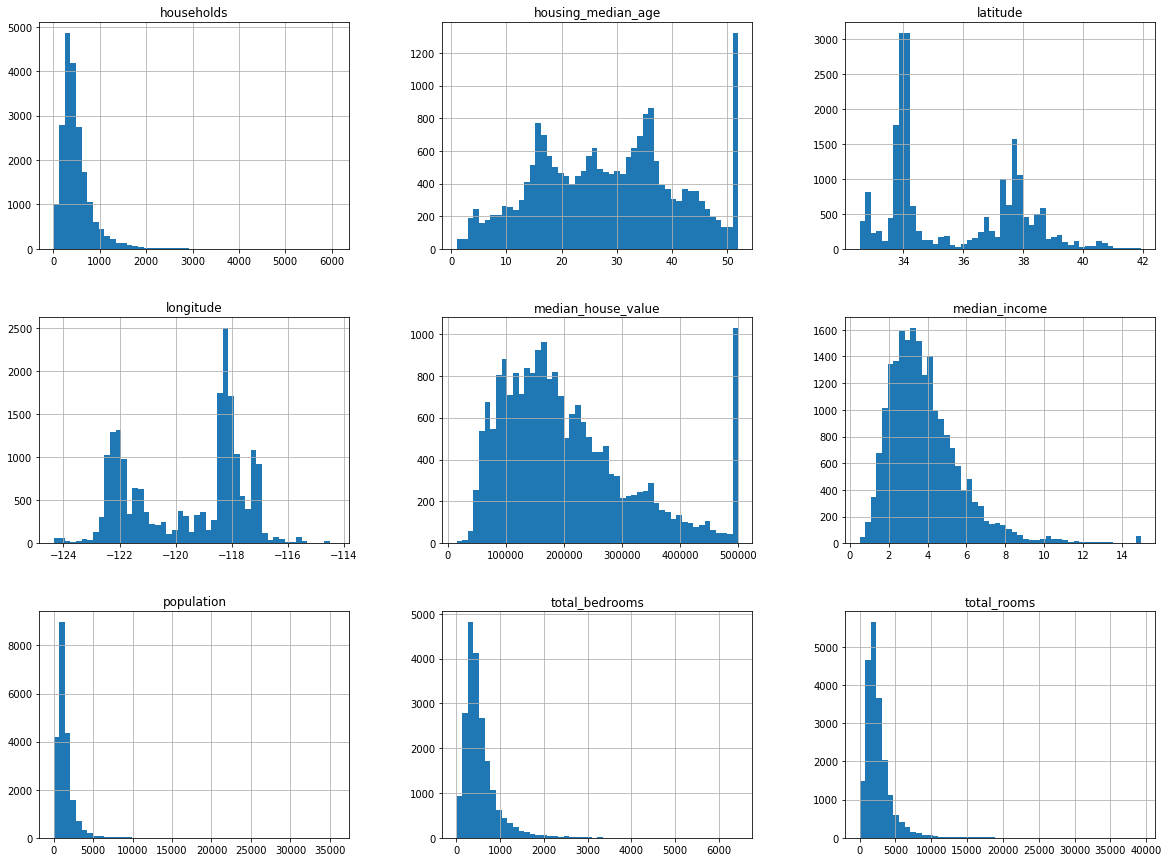

In [16]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

Create a Test Set

- Your brain is an amazing pattern recognition system, which means that it's highly prone to overfitting.
- Manually overfitting to the test set is called data snooping bias.
- Creating a test set is easy, randomly (or not if you're dealing with timeseries) select a subset of the data, typically 20% (or less if the dataset is large).

In [39]:
def split_train_test(data, test_ratio=0.2):
    """Splits a dataset into train/test using a `test_ratio`.
    
    # Arguments
        data, pd.DataFrame: the whole dataset.
        test_ratio, float: the percentage taken from the original dataset as a test set.
    
    # Returns
        train, pd.DataFrame: the training set.
        test, pd.DataFrame: the test set.
    """
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices] 

In [40]:
train_set, test_set = split_train_test(data=housing)
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

- There is one issue though: if you run the program again, it will generate a different test set.
    - Over time, you and your machine learning algorithm will get to see the whole dataset
        - Which is a thing that you want to avoid, test sets are created to be hidden from the algorithm/your eyeballs until you're done modeling.
- There are 2 possible solutions to this problem
    - Save the test set in the first run.
    - Set the random seed (random.seed(N)) before running `np.random.permutation`, in this way you're controlling the randomness of `numpy`.
- But both solutions will break next time you upload an **updated** dataset.
- To have a stable train/test sets, a common solution is to use each instance's indentifier to decide whether to include it in the test set or not.
    - Assuming the instances have a unique and ammutable identifier.
- For example, you can compute a hash based on each instance's identifier than only allow (to the test set) hashes that are lower than 20% of the maximum hash value.
    - Scalable: you will always have 20% of the data in the test set.
    - Extendable: when you have a bigger dataset, you only have to add new instances to the test set, both sets are stable.
- Here is a possible implementation:

In [22]:
from zlib import crc32

def test_set_check(identifier, test_ratio=.2):
    """Checks if an instance with `identifier` should be in the test set of overall ratio `test_ratio`
    
    # Arguments:
        identifier, int: the instance/row identifier (ex. row index from `pd.DataFrame`)
        test_ratio, float \in [0,1]: percentage of test set taken from overall data set.
    
    # Returns:
        in_test, bool: True if instance should be in the test set, False otherwise.
    
    # Notes:
        - The CRC32 function converts a varibale-length string into an 8-character string that 
        is a text representation of the hexadecimal value of a 32bit binary sequence.
    """
    total_size = 2**32
    hex_repr = crc32(np.int64(identifier)) & 0xffffffff
    in_test = hex_repr < (test_ratio * total_size)
    return in_test

# [test_set_check(i) for i in range(10)]

def split_train_test_by_id(data, test_ratio, id_column):
    """Splits a dataframe using hash-based identification
    
    # Arguments:
        data, pd.DataFrame: the dataframe comprised of an id column and data of interest.
        test_ratio, float \in [0,1]: percentage of test set taken from overall data set.
        id_column, string: column name with identifiers for each row.
    
    # Returns:
        train, pd.DataFrame: the train set.
        test, pd.DataFrame: the test set.
    """
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

[False, False, True, False, False, True, False, False, False, False]

- Unfortunately, the housing dataset does not have an identifier, column.
    - We will use the row index as an identifier:

In [24]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(data=housing_with_id, 
                                             test_ratio=0.2, 
                                             id_column="index")
train_set.shape, test_set.shape

((16512, 11), (4128, 11))

- If you use the row index as an identifier, you need to preserve the order at all costs
    - Make sure new data gets appended to the end of the dataframe
    - Make sure no rows are deleted/altered
- If the previous is not feasible, you can try to build an identifier from the multiple features of each row.
    - For example: a (Latitude/longitude) couple is guaranteed to be stable a few million years, so you can build a unique index based of it.
- The following procedure creates a unique identifier for each row:
    1. Convert latitude/longitude values from $\Bbb{R}$ to $\Bbb{Z}$ (by $\times 100$)
    2. Convert latitude/longitude from $\Bbb{Z}$ to $\Bbb{N}$ using:
$$
f(n) =
\begin{cases}
2n,  & \text{if $n \ge 0$} \\
-2n-1, & \text{if $n \lt 0$}
\end{cases}
$$
    3. Use `Cantor Pairing` function to create unique indexes from $\Bbb{N}^2$ tuples using:
$$\pi(k_{1},k_{2})={(k_{1}+k_{2})\cdot{(k_{1}+k_{2}+1)}\over{2}}+k_{2}$$
- Let's implement it:

In [25]:
def from_Z_to_N(z):
    """Converts a number from \Bbb{Z} to \Bbb{N}
    
    # Arguments
        z, integer: in \Bbb{Z}
    
    # Returns
        n, natural number: in \Bbb{N}
    """
    if z >= 0:
        n = 2 * z
    else:
        n = -2 * z - 1
    return n

def cantor_pairing(n1, n2):
    """Creates a unique number `n` in \Bbb{N} from a tuple (n1,n2) in \Bbb{N}^2
    
    # Arguments
        n1, natural number: first element of the tuple.
        n2, natural number: second element of the tuple.
    
    # Returns
        n, natural number: unique index from tuple (n1,n2).
    """
    n = ( ( (n1 + n2) * (n1 + n2 + 1) ) / 2 ) + n2
    return n

def lat_lon_to_index(lat, lon):
    """Converts a tuple of (lat,lon) to a unique index in \Bbb{N}
    
    # Arguments
        lat, float: latitude.
        lon, float: longitude.
    
    # Returns
        index, positive int: unique index.
    
    # Notes
        - 3 steps to do it:
            1. Convert (lat,lon) to \Bbb{Z} by *100.
            2. Convert (lat,lon) from \Bbb{Z} to \Bbb{N} using `from_Z_to_N()`
            3. Create the unique index using `cantor_pairing(_,_)`
    """
    lat, lon = int(lat*100), int(lon*100)
    lat, lon = from_Z_to_N(lat), from_Z_to_N(lon)
    index = cantor_pairing(lat, lon)
    return np.int64(index)

In [26]:
housing['id'] = housing.apply(lambda row: lat_lon_to_index(row['latitude'], 
                                                           row['longitude']), axis=1)
housing['id'].value_counts()

513289261    24
513481522    20
513417431    18
513353344    18
463548767    14
             ..
467821317     1
466232077     1
459780879     1
463061777     1
525471590     1
Name: id, Length: 11573, dtype: int64

We still get duplicate indexes, and at the same time, we have duplicate (lat,lon) tuples as follows:

In [27]:
housing.groupby(by=['longitude', 'latitude']).count()['total_rooms'].sort_values()

longitude  latitude
-124.35    40.54        1
-118.90    34.41        1
           35.26        1
           35.41        1
-118.89    34.22        1
                       ..
-122.41    37.75       10
-122.42    37.75       10
-122.44    37.78       11
-122.42    37.80       11
-122.41    37.80       15
Name: total_rooms, Length: 12590, dtype: int64

It's time to revert back to the book:

In [28]:
del(housing['id'])
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(data=housing_with_id, 
                                             test_ratio=0.2, 
                                             id_column='id')
train_set.shape, test_set.shape

((16322, 12), (4318, 12))

- `scikit-learn` provides multiple functions to split datasets in various ways.
    - The simplest function is `train_test_split()`
- Let's reproduce our implementation using sklearn's `train_test_split()`:

In [29]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

- So far we have considered purely random sampling methods.
    - This is generally fine if your dataset is large enough.
    - If it's not, you're running the chance of introducing a significant sampling bias.
- When a survey company plans to interview 1,000 people, they don't pick them at random from a phone book.
    - They make sure the 1,000 selected people are representative of the whole target population.
- this is called **stratified sampling**
    - The population is divided into homogenuous subgroups called strata
    - Each stratum represents an instances percentage of the overall population
    - We want a test set to maintain the percentages of each stratum to make sure it's representative of the whole population
    - A purely random sampling method will introduce biases that are in favour of dominant groups/strata
- Suppose you chatted with experts who told you that the `median income` attribute is a very important feature to predict `median_house_value`.
- You may want to ensure that the test set is representative of the overall `median income` distribution, that may be divided into categories.
- Most median income values are clustered around $\$15,000$ to $\$60,000$.
    - But some median incomes go far beyond $6$
- It is important to have, for each stratum, a sufficient number of instances in your dataset.
    - or else, there might be a bias while assessing the stratum importance.
- Let's use `pd.cut` to create the strata:

In [54]:
housing['income_cat'] = pd.cut(x=housing['median_income'], 
                               bins=[0, 1.5, 3, 4.5, 6, np.inf], 
                               labels=[1, 2, 3, 4, 5])

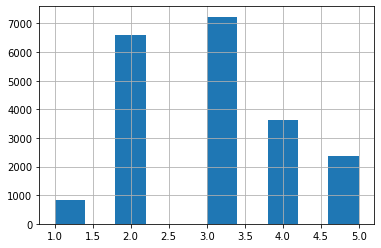

In [55]:
# visualize the categories
housing['income_cat'].hist()

- Now you are ready to do stratified sampling based on income category:

In [57]:
from sklearn.model_selection import StratifiedShuffleSplit

In [58]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [60]:
split

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)

In [67]:
for train_index, test_index in split.split(X=housing, y=housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

- Let's check if this worked as expected, we can start by checking the proportions of income categories in the test set:

In [68]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

- Now that we have a test set that is representative of the whole data in terms of `income_cat`, it's time to remove it:

In [69]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

- We spent a considerable amount of time on test set generation because this is an important part of any machine learning project
- Moreover, many of these ideas will be useful later when we talk about cross-validation.

## 3.Discover & Visualize the Data to Gain Insights

- First, make sure you have put the test set aside, and you are only exploring the training set:

In [70]:
strat_train_set.shape, strat_test_set.shape

((16512, 10), (4128, 10))

- Let's create a copy of the training set for us to play with it without harming the original one:

In [72]:
housing = strat_train_set.copy(); housing.shape

(16512, 10)

### Visualizing Geographical Data

- Since there is latitude/longitude information, it's a good idea to use pandas' matplotlib plot method to visualize the districts of interest using `.plot()`

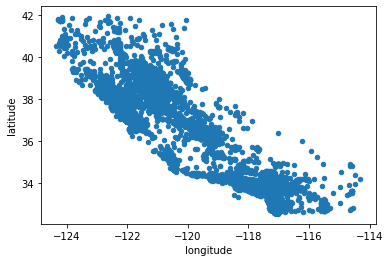

In [73]:
housing.plot(kind='scatter', x='longitude', y='latitude')
plt.show()

- This looks like california, but other than that, we can't really see any other pattern.
- Setting the alpha to 0.1 makes it much easier to estimate densities:

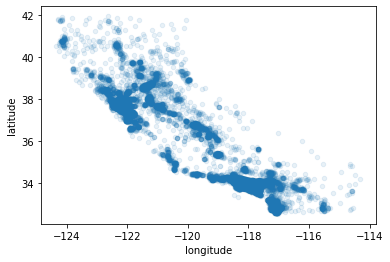

In [75]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
plt.show()

- Our brains are wired up to spot patterns in pictures, the tricky thing though is that you have to play around with matplotlib's visualization parameters to make the patterns stand out.
- Now let's look at the housing prices
    - The radius of each circle represents the district's population — option `s`
    - The color represents the price — option `c`
    - We will use a pre-defined color map called **jet** — option `cmap`
        - jet ranges from blue (low levels) to red (high level)

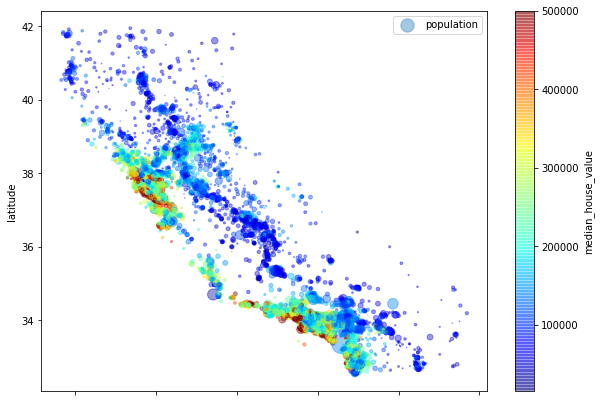

In [76]:
housing.plot(kind='scatter', x='longitude', y='latitude', 
             alpha=.4, s=housing['population']/100., 
             label='population', figsize=(10, 7), 
             c='median_house_value', cmap=plt.get_cmap(name='jet'), 
             colorbar=True)
plt.legend()

- This image tells you that the median housing price is pretty much related to location (closer to the sea -> more expensive) and ~~population~~.
    - The relation between population and price isn't that obvious, let's check it out:

In [78]:
housing[['population', 'median_house_value']].corr()

,population,median_house_value
population,1.00000,-0.02692
median_house_value,-0.02692,1.00000


- A very weak pair-wise correlation between price and population.
    - We leave it at that & we continue with the book.

### Looking for Correlations

- Since the dataset is not too large, we can easily compute the standard correlation coefficient of every pair of columns:

In [79]:
corr_matrix = housing.corr()

- Now let's look at how much each attribute correlates with `house_median_value`:

In [80]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

- The correlation coefficient is $\in [-1,1]$ 
    - When the coefficient is close to 1 it means there exist a strong positive correlation between the two variables.
        - For example. the median house value tends to go up with the median average income goes up.
    - When the coefficient is close to -1 it means there exist a strong negative correlation between the two variables.
    - When teh coefficient is close to 0 it means that there is a weak correlation between the two variables.
- The following figure shows multiple bi-variate plots and their corresponding correlation coefficient:

<div style="text-align:center;"><img style="width:50%" src="static/imgs/corr_examples.png" /></div>

- The correlation coefficients only measure linear correlations (if X goes up, Y goes up/down).
- The correlation coefficient has nothing to do with the slope.
- Another way to look at correlations is to use the Pandas `.scatter_matrix()` method that would allow you to visualize correlations between any 2 attributes.
- Since we have 11 attributes and we cannot fit all plots, let's focus on the few promising ones.

In [82]:
from pandas.plotting import scatter_matrix

In [84]:
attributes = ['median_house_value', 
              'median_income', 
              'total_rooms', 
              'housing_median_age']

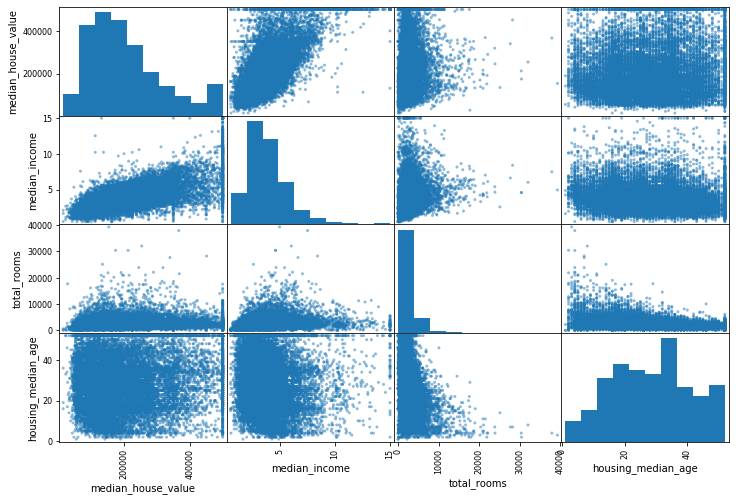

In [85]:
scatter_matrix(frame=housing[attributes], figsize=(12, 8))
plt.show()

- The most interesting attribute to predict `median_house_value` is `median_income`
- let's zoom in the correlation scatterplot:

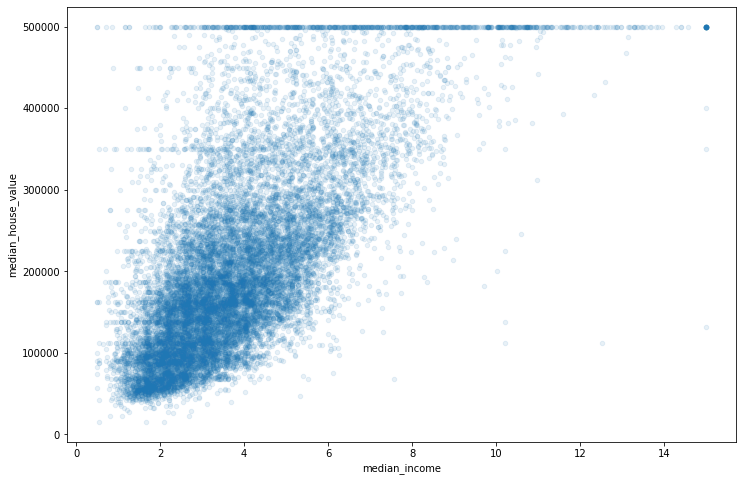

In [86]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', figsize=(12,8), alpha=0.1)
plt.show()

- The correlation is indeed very strong, you can clearly see the upward trend
- The price cap that we noticed earlier is clearly visible at 500,000USD, but the plot reveals other less obvious lines:
    - @ USD450K
    - @ USD350K
    - @ USD280K
    - ...
    - You may want to remove the corresponding districts for your model to not learn these quirks.

### Experimenting with Attribute Combinations

- You may want to transform tail heavy distributions using the logarithm.
- One last thing you want to do before feeding your data into an ML algorithm is to try a combination of different features.
    - Example: What you want to know is the number of rooms per household, not the total number of rooms in a district.
    - Example: the total number of bedrooms isn't helpful either, you want to compare it with the number of rooms.
    - Example: the number of poeple per household is also an interesting feature to look at.
- Let's create them all:

In [87]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

- Let's look at the correlation matrix again:

In [89]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

- `bedrooms_per_room` is much more correlated with `median_house_value`
    - The more expensive the house, the less its bedrooms per room ratio
- `rooms_per_household` have a moderate positive correlation with `median_house_value`
    - The more expensive a house is, the more rooms it will have.
- You don't have to go through every correlation/feature/engineered feature.
    - The goal is to start at the right place.
- This is an **iterative** process
    - Once you have a model up and running, you can analyze its outputs and go back to this step to explore the data again.

## 4. Prepare the Data for Machine Learning Algorithms

- Instead of doing this manually, you should write functions for this purpose, for the following reasons:
    - This will allow you to reproduce these transformations on any fresh dataset.
    - You will gradually build a library of transformations that you can use in future projects.
    - You can use these functions in your live systems to transform the data using a pipeline before feeding it into the algorithm
    - This will make it possible for you to try various transformations or a combination of them to check what works best.
- Let's start with a fresh dataset again:

In [90]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
housing.shape, housing_labels.shape

((16512, 9), (16512,))

### Data Cleaning

- Most machine learning algorithms cannot deal with missing features, so let's create a few functions to deal with them.
- We saw earlier that `total_bedrooms` have missing values, we have 3 options:
    1. Get rid of the corresponding districts
        - `housing.dropna(subset='total_bedrooms')`
    2. Get rid of the whole attribute (feature)
        - `housing.drop('total_bedrooms', axis=1)`
    3. Set the missing values to some value (zero, mean, median, regressor preds,...)
        - `median = housing['total_bedrooms'].median()`
        - `housing['total_bedrooms'].fillna(median, inplace=True)`
- We can also use `scikit-learn`'s `SimpleImputer`:

In [91]:
from sklearn.impute import SimpleImputer

In [92]:
imputer = SimpleImputer(strategy='median')

- Since the imputer can only work on numerical attributes, you need to create a copy of the dataFrame without the `OCEAN_PROXIMITY` text attribute:

In [93]:
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

- The imputer has simply calculated the median of all attributes and stored them in `.statistics_`.

In [94]:
X = imputer.transform(housing_num)
X.shape

(16512, 8)

In [95]:
housing_tr = pd.DataFrame(data=X, 
                          index=housing_num.index, 
                          columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


### Handling Text & Categorical Attributes
- So far, we have only dealt with numerical attributes, now, let's check text/categorical attributes.
- We have only 1: `ocean_proximity`.
- let's look at its value for the 10 first instances:

In [97]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


- There is a limited number of values, each of which represents a category:

In [98]:
housing_cat['ocean_proximity'].value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

- Most ML algorithms prefer to work with numbers, so let's convert the text into **ordinal categorical** numbers:
- You can get the list of categories using the `categories_` attribute of the `OrdinalEncoder`:

In [118]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat.values)
housing_cat_encoded.shape
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

- One issue with this representation is that the encoder will assume that two nearby categories are more similar than distant ones.
    - But this is not the case for us (ex. categories 0 and 4 are clearly more similar than 0 and 1)
- To fix this issue, we create one binary atttribute per category
    - One attribute is equal to 1 if the category is equal to `<1H OCEAN` and 0 otherwise.
    - One attribute is equal to 1 if the category is equal to `INLAND` and 0 otherwise.
    - ...
- This is called 1-hot encoding because, for any row, only one binary attribute will be equal to 1 (hot), while the others are 0s (cold).
- The new attributes are sometimes called dummy attributes, let's create them:

In [105]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
housing_cat_1hot = one_hot_encoder.fit_transform(housing_cat.values)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

- The output is a sparse scipy matrix instead of a numpy array.
    - If we use numpy, we have to store all of the zeros in memory, comprising of most of the array.
    - Instead, we store the information as a Scipy sparse matrix which only stores the locations of the non-zeros.
        - More efficient.
- You can mostly use it as a normal 2D array, but if you want to convert it into a dense numpy array:

In [107]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [108]:
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

- If a categorical feature has a large number of possible values (ex. country, postcode, city, ...) then a 1-hot encoding will result in a large number of input features.
- This may slow down training and degrade performance.
- You may want to replace the categorical inputs with numerical features that relate to the categorical values
    - Ex. replace country with its GDP/Area/Population
    - Ex. replace `ocean_proximity` with `distance_to_ocean`.
- Alternatively, you could replace the categorical features with low-dimensional learnable vectors called embeddings.
    - Each category's representation would be learned during training.
    - This is part of what's called "representation learning"

### Custom Transformers

- Although scikit-learn provided many useful transformers, you will need to write your own for custom tasks such as data cleanup or feature engineering.
- You will want your transformer to easily work with other scikit-learn functionalities (such as Pipelines).
- All you need to know is to create a class with 3 methods: `fit`, `transform`, `fit_transform`.
- You can get `fit_transform` for free by adding `TransformerMixin` as a base class.
- If you add `BaseEstimator` as another base class & avoid the use of *args and *\*kwargs, you will get two extra methods
    - `.get_params()`
    - `.set_params()`
- For example, here is a small transformer that adds the combined attributes discussed earlier:

In [109]:
from sklearn.base import TransformerMixin, BaseEstimator
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

In [114]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    """Engineers new features from existing ones: `rooms_per_household`, `population_per_household`, `bedrooms_per_room`
    # Functions:
        np.c_ is another way of doing array concatenate.
    # Arguments:
        add_bedrooms_per_room, bool: defaults to True. Indicates if we want to add the feature `bedrooms_per_room`.
    """
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self  # We don't have any internal parameters. Only interested in transforming data.
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [115]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

- The `add_bedrooms_per_room` hyper-parameter will easily help you find out whether adding the attributes helps the ML algorithm or not.
- You can add hyper-parameters to get any pre-processing step that you're not sure about.
- The more your automate these data preprocessing steps, the more combinations you get to try out.
    - You will more likely find a great combination of steps to take to maximize performance.
    - & this will save you a ton of time.

### Feature Scaling

- With few exceptions, ML algorithms don't perform well on data features that have different scales.
- Scaling the target value is generally not required.
- There are two ways to get all features to have the same scale:
    - Min-Max scaling
        - For each value, we subtract by the `min` and divide by `max - min`.
    - Standarization
        - For each value, we subtract the `mean` and divide by `std`
        - Producing values with a mean of 0 and a standard deviation of 1.
        - Unlike Min-Max scaling, standarization doesn't bound values to a specific range.
        - This can cause problems for some ML algorithms.
            - Ex. NNs usually expect inputs range from 0 to 1.
        - However, standarization is much less effected by outliers.
- As with all transformers, It's important to fit to the training data only, not the full dataset.

### Transformation Pipelines

- There are many transformation steps that need to be executed in the right order.
- Scikit-learn provides the **Pipeline** class to help you with chaining transformations in sequences.
- Here is a small pipeline for the numerical attribtues:

In [168]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr.shape

(16512, 11)

- So far, we have handeled categorical/continuous columns separately.
- It would be better if we had a single transformer that is able to transform all columns.
- `ColumnTransformer`s to the rescue: 

In [169]:
from sklearn.compose import ColumnTransformer

num_attribs = housing_num.columns.tolist()
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 16)

- **That's it!**, we have a pre-processing pipeline that takes the data and transform it into data that we can feed to an ML algorithm.

## 5. Select & Train a Model

- You are now ready to select & train an ML model.

### Training & Evaluating on the Training Set

- Thanks to all the previous steps, things are going to be much simpler from now on.
- Let's first train a Linear Regression model, like we did in the previous chapter:

In [150]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X=housing_prepared, y=housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Let's try the model on a few instances from the training set:

In [166]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: ", lin_reg.predict(some_data_prepared))
print("Labels: ", some_labels.tolist())

Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


- It works, although the predictions are not exactly accurate.
- Let's measure the performance of our model using the RMSE metric.

In [165]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)

lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

- Most districts median housing values range between 120K to 265K, so an average error of 68K is not good.
- This is an example of a model overfitting the data.
- When this happens, it can mean two things:
    - The features do not provide enough information to make better predictions.
    - The model is not powerful enough, meaning its hypothesis space is narrow.
- The main ways to tackle underfitting:
    - To feed the model better features.
    - To select a more powerful model.
    - To loosen the model's restrictions.
- This model is not regularized, which rules out the last option.
- You could try to input more features, but let's start by testing a more powerful model.
- Let's try out `DecisionTreeRegressor`, this is a powerful model, capable of finding non-linear relationships within the data:

In [162]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X=housing_prepared, y=housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

- Now that the model is trained, let's evaluate its performance on the training set:

In [167]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(y_true=housing_labels,
                              y_pred=housing_predictions)

tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

0.0


- It is either the model is absolutely perfect, or it badly overfit the data.
- how can we be so sure?
    - As we know, we shouldn't touch the test set until we are ready for deployment.
    - The solution is to partition the training data itself and extract a validation set.

### Better Evaluation using Cross-Validation
- One way to evaluate your model is to use `train_test_split()` again on the training set, extract a validation set and evaluate your iterative models on it.
    - This is solid strategy.
- A great alternative is to use K-fold cross-validation.
    - You randomly split the training data into 10 folds, you iteratively train your model on 9 folds and evaluate on 1, doing this 10 times.
        - You will endup with 10 metric scroes:

In [171]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=tree_reg, 
                         X=housing_prepared,
                         y=housing_labels, 
                         scoring='neg_mean_squared_error', 
                         cv=10)
tree_rmse_scores = np.sqrt(-scores)

- scikit-learn's cross validation features expect a utility function (the greater the better) rather than a cost function (the lower the better).
    - That's why we used `ned_mean_squared_error` and we negated it at RMSE evaluation
- Let's look at the results:

In [172]:
def display_scores(scores):
    """Displays the scores, their mean, and the standard deviation.
    
    # Arguments:
        scores, np.array: list of scores given by the cross validation procedure.
    """
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [68328.61806215 67411.77389095 69911.13003321 68339.95281574
 71836.0090057  76228.750656   72865.67416495 69845.02927478
 75260.07839271 70094.65451145]
Mean: 71012.16708076443
Standard Deviation: 2830.070967801256


- The decision tree seems to perform worse than the linear regression model!
- Notice that cross validation allows you to not only get an estimate of the performance of your model (mean), but how precise it is (std).
    - You would not have this estimation if you used only one validation set.
- But cross-validation comes at the cost of training the model several times, which is not always possible.
- Let's compute the same scores for the linear regression model just to be sure:

In [173]:
scores = cross_val_score(estimator=lin_reg,
                         X=housing_prepared,
                         y=housing_labels,
                         scoring='neg_mean_squared_error', 
                         cv=10)

lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard Deviation: 2731.674001798348


- That's right! the decision tree model is overfitting so badly that it performs worse than the linear regression model.
- Let's try one last model now, the random forest regressor.
    - random forests work by training many decision trees on random feature subsets then average out their predictions.
- Building a model on top of many other models is called **Ensemble Learning**.

In [174]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X=housing_prepared, y=housing_labels)
forest_mse = mean_squared_error(y_true=housing_labels, 
                                y_pred=forest_reg.predict(X=housing_prepared))

forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

scores = cross_val_score(estimator=forest_reg, 
                         X=housing_prepared, 
                         y=housing_labels, 
                         scoring='neg_mean_squared_error', 
                         cv=10)

forest_rmse_scores = np.sqrt(-scores)
display_scores(scores=forest_rmse_scores)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


22686.14135353731
Scores: [51811.80426793 51290.51729483 52908.30518333 55263.07567467
 52735.60296673 54998.04102696 50869.97970149 50666.26408045
 55399.92878639 52490.96657965]
Mean: 52843.44855624174
Standard Deviation: 1711.2315119204773


- This is much better, random forests seem very promissing
    - But notice that the RMSE on the training set is still much lower then the validation RMSE
        - meaning the model overfitted, but not as badly as the decision tree model.
- Possible solutions to overfitting are:
    - Get more training data
    - Simplify the model
    - Regularize the model
- You should save any model after training so that you can come back to it at any time you want.
- Make sure you save both the hyper-parameters and the parameters (weights) of the model.
- You can easily save scikit-learn models using Python's `joblib`:

In [ ]:
import joblib
joblib.dump(value=forest_reg, filename='models/01/forest_reg.m')
# & later
forest_reg = joblib.load(filename='models/01/forest_reg.m')

## 6. Fine-Tune Your Model

- Let's assume you have a short list of promising models, now you want to find a way to fine-tune them, let's do that:

### Grid Search

- One option would be to try out many hyper-parameters manually, but this would be considered tedious work and you might not even have the time to do it.
- Instead, you should just use scikit-learn's `GridSearchCV`
    - You just tell it which hyper-parameters and values to test.
    - It will test out all combinations of hyper-parameters and use cross-validation for evaluation.

In [179]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
     'n_estimators': [3, 10, 30],
     'max_features': [2, 4, 6, 8]
    },
    {
     'bootstrap': [False],
     'n_estimators': [3, 10],
     'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(
        estimator=forest_reg,
        param_grid=param_grid,
        scoring='neg_mean_squared_error', 
        cv=5, 
        return_train_score=True, 
        n_jobs=-1)

grid_search.fit(X=housing_prepared, y=housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

- If you don't have an idea of quality search grids, you can start with power of 10s then zoom in once you have the best estimate.
- The model will first explore $3 \times 4$ combinations of hyper-parameters, then jump to the 2nd hyper-parameter space and try $1 \times 2 \times 3$.
    - And for each combination, it will train for 5 times using the cross validation strategy, all in all: It will train **90** different model variations.

In [181]:
print(grid_search.best_params_)

grid_search.best_estimator_

{'max_features': 6, 'n_estimators': 30}


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

- When `GridSearchCV` finds the best estimator, it will retrain it on the whole training set.
    - this can be controlled by the parameter `refit=True` (by default)
- Re-training the best model on the whole training data is generally a good practice.
- & ofcoures, the evaluation scores are also available:

In [182]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

65123.262457024306 {'max_features': 2, 'n_estimators': 3}
55587.30116181809 {'max_features': 2, 'n_estimators': 10}
53034.65014788274 {'max_features': 2, 'n_estimators': 30}
60211.16182186041 {'max_features': 4, 'n_estimators': 3}
52824.18322503606 {'max_features': 4, 'n_estimators': 10}
50361.376369742706 {'max_features': 4, 'n_estimators': 30}
59505.26100841058 {'max_features': 6, 'n_estimators': 3}
51982.10634393145 {'max_features': 6, 'n_estimators': 10}
50249.16386931803 {'max_features': 6, 'n_estimators': 30}
58565.19105232616 {'max_features': 8, 'n_estimators': 3}
52468.660438817875 {'max_features': 8, 'n_estimators': 10}
50321.96504619469 {'max_features': 8, 'n_estimators': 30}
62036.41559743196 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54427.278216561484 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59466.43835065933 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52806.28900944045 {'bootstrap': False, 'max_features': 3, 'n_estimators'

- In this example, the best hyper-parameter combination is: `50110.7370892457 {'max_features': 6, 'n_estimators': 30}`
    - With an average RMSE of $50110$
        - Slightly better than the performance of a random forest with default hyper-parameters.
- Don't forget that you can treat some of the pre-processing steps as hyper-parameters:
    - To test if adding a feature is better or not combined with the many algorithm hyper-parameters.
    - Same with best ways to handle outliers, feature selection, scaling method, and more...

### Randomized Search

- The grid search is fine when you're exploring a few hyper-parameter combinations.
- When the search space is big though, it is better to use `RandomizedSearchCV` instead.
- It works almost in the same way of a grid search, but it try out a limited randomly selected number of hyper-paraemeters for each iteration.
- This approach has two main benefits
    - If you let this approach run for 1,000 iterations, it will explore 1,000 values for each hyper-parameters, instead of combining each unique value.
    - Simply by setting the number of iterations, you can control computing resources much more effectively than doing Grid search.

### Ensemble Methods
- Another way to fine-tune your model is to combine the models that work best.
- Usually, the ensemble model will perform better than any part of the model, especially if its models are producing different errors.

### Analyze the best models & their errors
- You will often gain good insights about the problem by inspecting good models.
- For example, the random forest model can give you estimates over feature importance:

In [191]:
full_pipeline.named_transformers_

{'num': Pipeline(memory=None,
          steps=[('imputer',
                  SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                missing_values=nan, strategy='median',
                                verbose=0)),
                 ('attribs_adder',
                  CombinedAttributesAdder(add_bedrooms_per_room=True)),
                 ('std_scaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True))],
          verbose=False),
 'cat': OneHotEncoder(categorical_features=None, categories=None, drop=None,
               dtype=<class 'numpy.float64'>, handle_unknown='error',
               n_values=None, sparse=True)}

In [185]:
feature_importances = grid_search.best_estimator_.feature_importances_
(feature_importances*100).astype(int)

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attributes = cat_encoder.categories_[0].tolist()
attributes = num_attribs + extra_attribs + cat_one_hot_attributes

In [186]:
# sorted(zip(feature_importances, attributes), reverse=True)
dict(zip(feature_importances, attributes))

{0.07970749586698385: 'longitude',
 0.0711402265196868: 'latitude',
 0.04093681125125394: 'housing_median_age',
 0.01913511328985233: 'total_rooms',
 0.016654112553297105: 'total_bedrooms',
 0.017547233943493265: 'population',
 0.015303843160533744: 'households',
 0.3252592585284537: 'median_income',
 0.06462784241673386: 'rooms_per_hhold',
 0.10684344220145194: 'pop_per_hhold',
 0.0675912932188421: 'bedrooms_per_room',
 0.014835795945369771: '<1H OCEAN',
 0.15396217994818534: 'INLAND',
 6.168339033183307e-05: 'ISLAND',
 0.003625798519837584: 'NEAR BAY',
 0.0027678692456927457: 'NEAR OCEAN'}

- With this information, you might want to start dropping some of the attributes to simplify the model.
    - ex. only one `ocean_proximity` value is important.
- You should also take a look at how your systems makes mistakes, try to know why, and fix that from a data engineering/model perspective.

### Evaluate your system on the test set
- After tweaking your system for a while, finally you have a model that you can evaluate on the test set.
- There is nothing special about this process, you reproduce the same steps you used with training data to benchmark the model.
    - But call `transform()`, and not `fit_transform()`.

In [188]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop(labels='median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X=X_test)
final_predictions = final_model.predict(X=X_test_prepared)

final_mse = mean_squared_error(y_true=y_test, y_pred=final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47418.96367666722

- In some cases, such a point estimate of the generalization error won't be quite enough for you to launch it in production.
    - You might want to create a confidence interval of 95% around the metric.
        - For this, you use the individual predictions for each test set element.

In [190]:
from scipy import stats
confidence = .95
squared_errors = (y_test - final_predictions) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([45456.78763669, 49303.11034905])

- If you do a lot of hyper-parameter fine-tuning, you will endup with a slightly worse performance on the test set.
    - Because you will sometimes overfit to the changing validation set.
- This didn't happen now, but when it happens, resist the temptation to go back and do more fine-tuning to have better results for the test set.
    - If you want to improve your model, just start over again.
- Pre-launch phase — **Document Everything**
    - Highlight what you have learned.
    - What worked & what did not.
    - What assumptions you made.
    - What your system's limitations are.
    - Create a clear presentation with nice visualizations and simple-to-remember statements.
- In our case with the California dataset, our system didn't actually beat the experts system (with 20% error).
    - **But management still decided to launch the service to free some time for its experts to work on other tasks.**

## 7. Launch, Monitor, & Maintain your system
- Perfect, you got approval to launch.
- Now you need to get your solution ready for production
    - document your code
    - write tests
    - ... 
- Then you can deploy your model to a production environment.
- One way to do this is to save the whole pre-processing pipeline, the predictor (using joblib) then load it into the production environment and use `.predict()` to output new predictions.
- You want to load the model upon server startup, rather than everytime it is used.

<div style="text-align:center;"><img style="width:50%;" src="static/imgs/micro-services.png"></div>

- You can hot-load the model within a web application, or alternatively, wrap the model around its own API end-point and design the web component separately.
    - This will allow you to upgrade your model to new versions without interrapting the web server.
    - Second option also allows scalability around the micro-services architecture, another advantage is that you don't have to write your web app using Python.
- But deploying is not the end of the story. You also need to write monitoring code to track the performance of your model within the live environment and send alerts when the performance drops.
    - This can be caused by either bad system architecture or model rotting since trends do change over time.
- Sometimes, model performance can be inferred from downstream tasks.
    - Like having a recommender system proposing products and then tracking sold recommended products to non-recommended products sold.
- Sometimes, It's not possible to determine the model's performance without human intervension
    - For example, a model that is supposed to detect errors in a production line for products
        - You would need to send a random sample of products that passed through and the model wasn't so sure about to be checked by a human expert.
- All of this can be a lot of work, and most of the times It'll be more work than training and building the whole model.
- If the data keeps evolving, you would need to re-train the model regularly.
- You would want to automate the process as much as possible
    - Collect fresh data regularly and label it.
    - Write a script to train the model and fine-tune the hyper-parameters regularly.
    - Write a script that would evaluate the new model's vs previous model's performance on the new test set and deploy if the performance increased.
- You should also make sure to evaluate the model's input data quality. 
    - Trigger an alert if ..
        - more and more inputs are missing a feature.
        - The data's mean/std drifts too far from the training set ones.
        - A categorical feature starts containing new categories.
- Finally, make sure to have a way to archive model history (save all exported models) and automate a way to roll back to previous ones.
- Also, keep backups of every dataset you produce so you can roll back to any one and test combinations of dataset and model versions.
- You also would want to save different test sets that target different data properties, ex. a test set containing only recent data or a test set containing one category from a feature.
    - This will help you analyze the strengths and weaknesses of your model.
- Much of the work is in the data preparation step.
    - Building monitoring tools, setting up pre-processing pipelines, and having human evaluators.
- It's preferrable to be familiar with the overall process and know 2 or 3 ML algorithms very well than to invest your time in advanced algorithms w/o practical knowledge.
- So, if you haven't done so, now is the time to pick your laptop, select a dataset, and apply the same process.
    - A clear place to do this is [Kaggle](https://kaggle.com).